In [ ]:
!pip install unsloth datasets transformers trl bitsandbytes matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.8/46.8 kB 2.3 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of torchvision to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 218.5/218.5 kB 11.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.4/491.4 kB 28.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 318.9/318.9 kB 28.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.1/76.1 MB 11.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 11.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.6/193.6 kB 17.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 14.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.1/162.1 kB 16.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.0/129.0 kB 16.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3

In [ ]:
from datasets import Dataset
from unsloth import FastLanguageModel
from trl import SFTTrainer
from transformers import TrainingArguments
import matplotlib.pyplot as plt
import json

🦥 Unsloth: Will patch your computer to enable 2x faster free finetuning.
🦥 Unsloth Zoo will now patch everything to make training faster!


In [ ]:
from datasets import load_dataset

dataset = load_dataset("dzunggg/legal-qa-v1", split="train")
print(dataset[0])

formatted_data = [
    {
        "input": f"### Question:\n{item['question']}\n### Answer:",
        "output": item["answer"]
    }
    for item in dataset
]

dataset = Dataset.from_list(formatted_data)

legal_qa_full.csv:   0%|          | 0.00/6.21M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/3742 [00:00<?, ? examples/s]

{'question': 'Q: I was wondering if a pain management office is acting illegally/did an illegal action.. I was discharged as a patient from a pain management office after them telling me that a previous pain management specialist I saw administered a steroid shot wrong and I told them in the portal that I spoke to lawyers for advice but no lawsuit/case was created. It was maybe 1-2 months after I was discharged that I no longer have access to my patient portal with them. Every time I try to login I enter my credentials, wait a few seconds, and then I get re-directed back to the original screen where I have various options to login. I know I can speak to the office directly and ask them about what specifically is going on, talk to other lawyers if this is a violation of my rights, etc. but I was just wondering if anyone on this site would know if this action is in fact illegal. ', 'answer': "A:In Kentucky, your situation raises questions about patient rights and medical records access. 

In [ ]:
formatted_data = formatted_data[:100]

In [ ]:
from unsloth import FastLanguageModel
import torch

model, tokenizer = FastLanguageModel.from_pretrained(
    model_name="unsloth/gemma-2b-bnb-4bit",
    max_seq_length=512,
    dtype=torch.float16,
    load_in_4bit=True,
    use_gradient_checkpointing=True,
    full_finetuning=False,
)

model = FastLanguageModel.get_peft_model(
    model,
    r=16,
    lora_alpha=16,
    lora_dropout=0.05,
    bias="none",
    use_gradient_checkpointing=True,
)

model.print_trainable_parameters()

from transformers import TrainingArguments
from trl import SFTTrainer

training_args = TrainingArguments(
    per_device_train_batch_size=2,
    num_train_epochs=3,
    learning_rate=2e-5,
    logging_dir="./logs",
    output_dir="./gemma-qa-checkpoints-1",
    logging_steps=5,
    save_steps=50,
    save_total_limit=1,
)

==((====))==  Unsloth 2025.4.7: Fast Gemma patching. Transformers: 4.51.3.
   \\   /|    Tesla T4. Num GPUs = 1. Max memory: 14.741 GB. Platform: Linux.
O^O/ \_/ \    Torch: 2.7.0+cu126. CUDA: 7.5. CUDA Toolkit: 12.6. Triton: 3.3.0
\        /    Bfloat16 = FALSE. FA [Xformers = 0.0.30. FA2 = False]
 "-____-"     Free license: http://github.com/unslothai/unsloth
Unsloth: Fast downloading is enabled - ignore downloading bars which are red colored!
trainable params: 19,611,648 || all params: 2,525,784,064 || trainable%: 0.7765


In [ ]:
import os
os.environ["WANDB_MODE"] = "disabled"

trainer = SFTTrainer(
    model=model,
    train_dataset=dataset,
    tokenizer=tokenizer,
    dataset_text_field="input",
    max_seq_length=512,
    packing=True,
    args=training_args,
)

Unsloth: Tokenizing ["input"] (num_proc=2):   0%|          | 0/3742 [00:00<?, ? examples/s]

Unsloth: Hugging Face's packing is currently buggy - we're disabling it for now!


In [ ]:
trainer.train()

==((====))==  Unsloth - 2x faster free finetuning | Num GPUs used = 1
   \\   /|    Num examples = 3,742 | Num Epochs = 3 | Total steps = 5,613
O^O/ \_/ \    Batch size per device = 2 | Gradient accumulation steps = 1
\        /    Data Parallel GPUs = 1 | Total batch size (2 x 1 x 1) = 2
 "-____-"     Trainable parameters = 19,611,648/2,000,000,000 (0.98% trained)
wandb: WARNING The `run_name` is currently set to the same value as `TrainingArguments.output_dir`. If this was not intended, please specify a different run name by setting the `TrainingArguments.run_name` parameter.


Step,Training Loss
5,3.641800
10,3.455700
15,3.075600
20,3.421600
25,3.395800
30,3.465100
35,3.290900
40,2.933200
45,2.974300
50,3.356900


TrainOutput(global_step=5613, training_loss=2.5771233518557306, metrics={'train_runtime': 2700.2401, 'train_samples_per_second': 4.157, 'train_steps_per_second': 2.079, 'total_flos': 1.998963771179827e+16, 'train_loss': 2.5771233518557306})

In [ ]:
output_dir = "./legal-qa-gemma-checkpoint-2"
model.save_pretrained(output_dir)
tokenizer.save_pretrained(output_dir)

('./legal-qa-gemma-checkpoint-2/tokenizer_config.json',
 './legal-qa-gemma-checkpoint-2/special_tokens_map.json',
 './legal-qa-gemma-checkpoint-2/tokenizer.model',
 './legal-qa-gemma-checkpoint-2/added_tokens.json',
 './legal-qa-gemma-checkpoint-2/tokenizer.json')

In [ ]:
import shutil
shutil.make_archive("legal-qa-gemma-checkpoint-2", 'zip', output_dir)

'/content/legal-qa-gemma-checkpoint-2.zip'

In [ ]:
from google.colab import files
files.download("legal-qa-gemma-checkpoint-2.zip")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

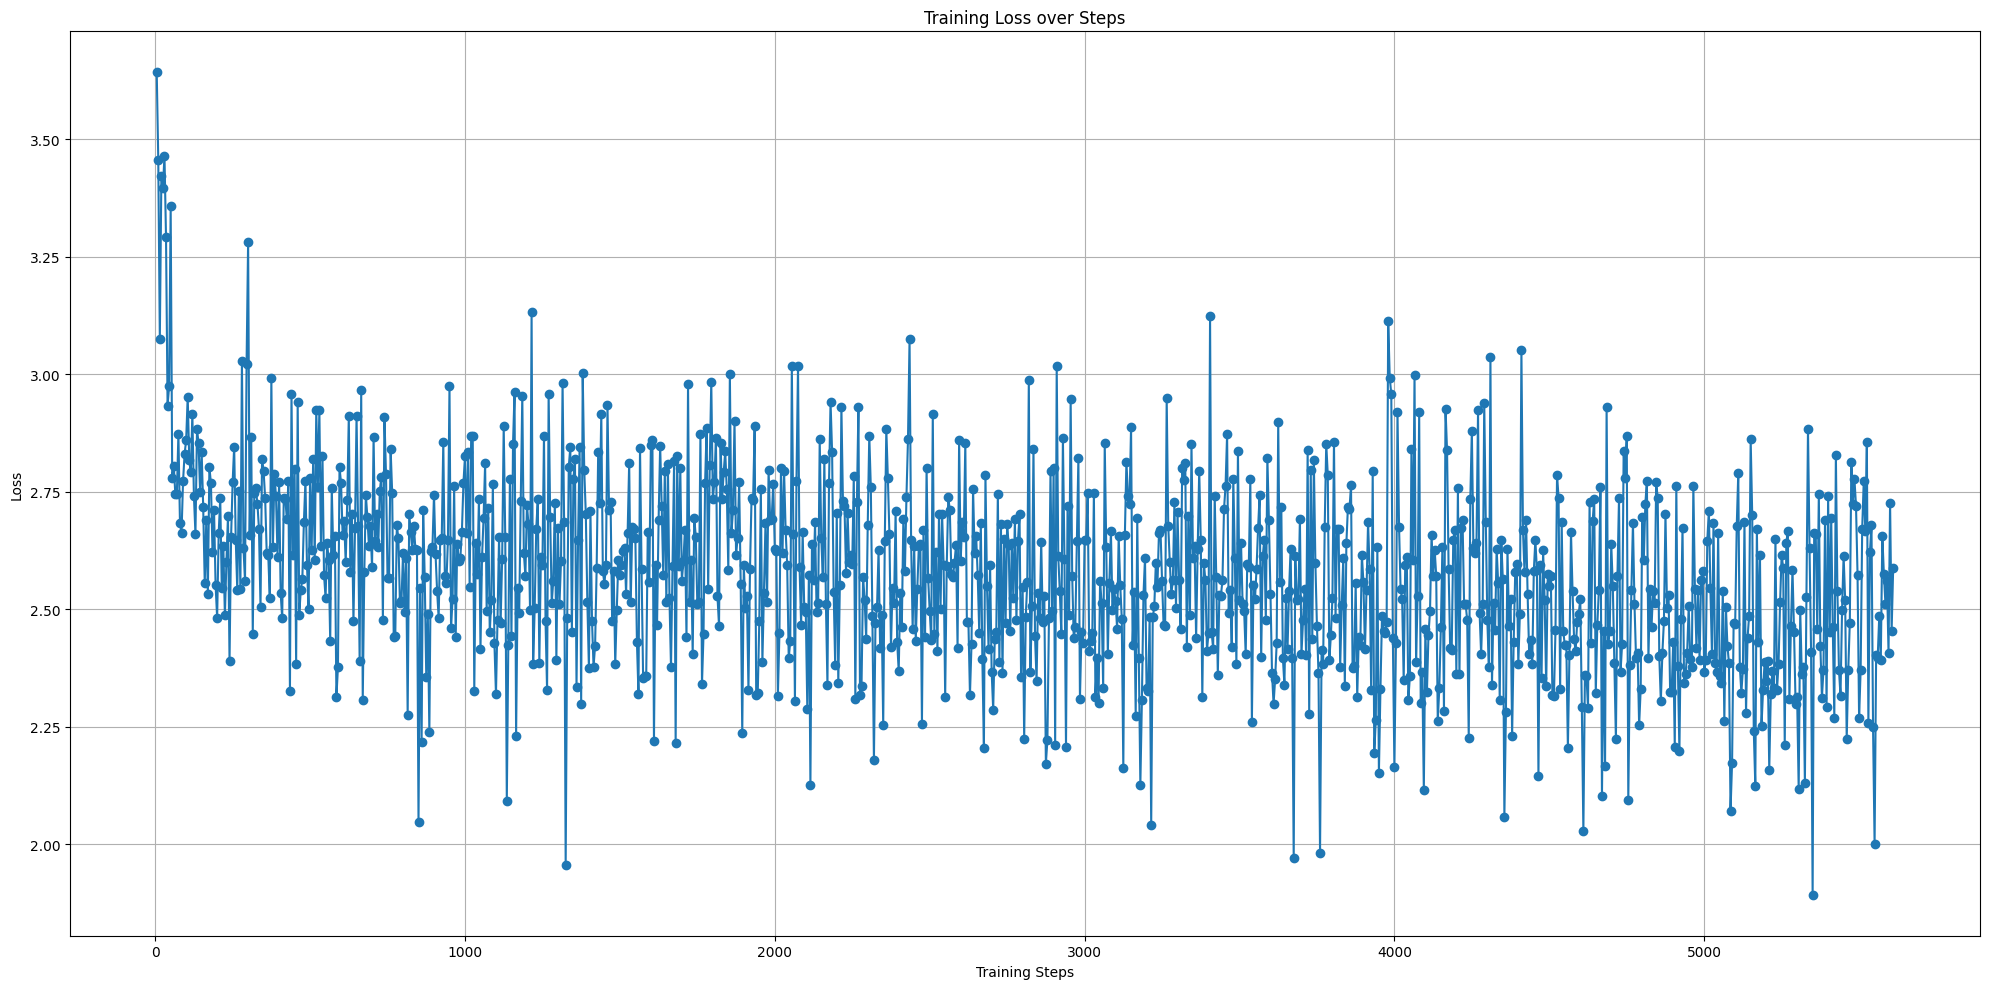

In [ ]:
import matplotlib.pyplot as plt

logs = trainer.state.log_history
loss = [entry["loss"] for entry in logs if "loss" in entry]
steps = [entry["step"] for entry in logs if "loss" in entry]

plt.figure(figsize=(20, 10))
plt.plot(steps, loss, marker='o')
plt.title("Training Loss over Steps")
plt.xlabel("Training Steps")
plt.ylabel("Loss")
plt.grid(True)
plt.tight_layout()
plt.show()

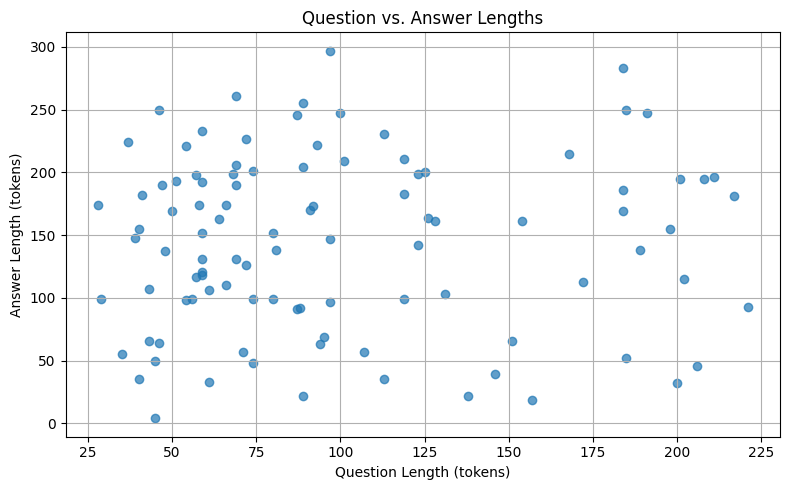

In [ ]:
import matplotlib.pyplot as plt

question_lengths = [len(example["input"].split()) for example in formatted_data]
answer_lengths = [len(example["output"].split()) for example in formatted_data]

plt.figure(figsize=(8, 5))
plt.scatter(question_lengths, answer_lengths, alpha=0.7)
plt.xlabel("Question Length (tokens)")
plt.ylabel("Answer Length (tokens)")
plt.title("Question vs. Answer Lengths")
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
from random import sample
from transformers import pipeline
from IPython.display import display, Markdown
pipe = pipeline(
    task="text-generation",
    model=model,
    tokenizer=tokenizer,
    max_new_tokens=50,
    do_sample=False,
    temperature=0.0
)

samples = sample(formatted_data, 5)

for idx, sample_qa in enumerate(samples, 1):
    question = sample_qa["input"]
    true_answer = sample_qa["output"]

    # Generate prediction
    response = pipe(question)[0]["generated_text"]
    model_answer = response.split("### Answer:")[-1].strip()

    display(Markdown(f"""
### 📝 Example {idx}

**🔹 Question:**
{question.replace('### Question:', '').replace('### Answer:', '').strip()}

**✅ Ground Truth Answer:**
> {true_answer}

**🤖 Model Generated Answer:**
> {model_answer}

---
"""))

Device set to use cuda:0
The model 'PeftModelForCausalLM' is not supported for text-generation. Supported models are ['AriaTextForCausalLM', 'BambaForCausalLM', 'BartForCausalLM', 'BertLMHeadModel', 'BertGenerationDecoder', 'BigBirdForCausalLM', 'BigBirdPegasusForCausalLM', 'BioGptForCausalLM', 'BlenderbotForCausalLM', 'BlenderbotSmallForCausalLM', 'BloomForCausalLM', 'CamembertForCausalLM', 'LlamaForCausalLM', 'CodeGenForCausalLM', 'CohereForCausalLM', 'Cohere2ForCausalLM', 'CpmAntForCausalLM', 'CTRLLMHeadModel', 'Data2VecTextForCausalLM', 'DbrxForCausalLM', 'DeepseekV3ForCausalLM', 'DiffLlamaForCausalLM', 'ElectraForCausalLM', 'Emu3ForCausalLM', 'ErnieForCausalLM', 'FalconForCausalLM', 'FalconMambaForCausalLM', 'FuyuForCausalLM', 'GemmaForCausalLM', 'Gemma2ForCausalLM', 'Gemma3ForConditionalGeneration', 'Gemma3ForCausalLM', 'GitForCausalLM', 'GlmForCausalLM', 'Glm4ForCausalLM', 'GotOcr2ForConditionalGeneration', 'GPT2LMHeadModel', 'GPT2LMHeadModel', 'GPTBigCodeForCausalLM', 'GPTNeoFo


### 📝 Example 1

**🔹 Question:**
Q: I was not convicted of a DUI, but am on parole and does not even have a revoked driving record. How can I possibly work. I have been living in hardship, financial situations because I can not even drive due to stipulation of no driving while on parole. I have not been revoked my license to drive, the last moving violation was in the year 2007. I am living in hard financial means and without being able to drive, my supervision fees have been in arrears for over 1 year. How can I ever get off of parole? It is ridiculous!! I can not ever get caught up with this stipulation of my driving privilege's stopped until I am no longer on Parole? Yet, my expiration keeps moving away from being able to move forward. NOR CAN I GET A JOB BECAUSE OF THIS RIDICULOUS STIPULATION. The DUI was dismissed way back in May of 2016, my last moving violation was in October of 2007. Please help!! I have not been able to get my life in order at all due to this ridiculous stipulation. I did 4 flat years, stupid because I did not know the law and took a 2-15 year sentence. I was not even driving, I was parked.

**✅ Ground Truth Answer:**
> A:You can request a modification to your parole conditions to allow you to drive. To do this, you will need to file a petition with the parole board. In your petition, you should explain why you need to drive, such as to get to work or to take care of your family. You should also explain that you have not been convicted of a DUI and that you have a clean driving record. The parole board will consider your petition and make a decision based on the best interests of your rehabilitation and public safety. If the parole board grants your request, you will be able to drive while you are on parole. Seek Employment Opportunities That Do Not Require Driving While you are waiting for a decision on your petition to modify your parole conditions, you can look for employment opportunities that do not require driving. There are many jobs that you can do from home or that are located close to where you live. You can also look for public transportation options that can help you get to work.

**🤖 Model Generated Answer:**
> I am not a lawyer. I am a paralegal. I am not a lawyer. I am not a lawyer. I am not a lawyer. I am not a lawyer. I am not a lawyer. I am not a lawyer.

---



### 📝 Example 2

**🔹 Question:**
Q: Do you represent a client that a has a case for officers violating their oath to up hold the constitutional?. I refused to ID myself. Arrested for illegal dumping. All I did was pull over and throw away the little bit of gas station at the hotel parking lot by a highway. Cleaned my car out checked the oil and there was a cop standing behind. I refused to provide my id. I have the video I can email a copy and you and make a choice.

**✅ Ground Truth Answer:**
> A:It's important to understand that while you have the right to refuse to provide identification in certain situations, there are circumstances where this can lead to legal complications. In your case, being arrested for illegal dumping suggests that the officers believed you were committing a violation. It’s essential to consider the specifics of Missouri law regarding identification and the obligations during police encounters. Regarding your question about officers violating their oath to uphold the Constitution, this can be a complex legal issue. It often depends on the details of the interaction and whether your rights were infringed upon. If you believe your constitutional rights were violated, it's advisable to consult with an attorney who can review your video evidence and provide guidance based on the specific facts of your case. Remember, each situation is unique and legal advice should be tailored to the individual circumstances. Seeking a consultation with a lawyer who can evaluate all aspects of your situation is the best course of action to understand your rights and options moving forward.

**🤖 Model Generated Answer:**
> I don’t represent anyone. I’m a lawyer. I don’t know if you have a case. I don’t know if you have a case. I don’t know if you have a case. I don’

---



### 📝 Example 3

**🔹 Question:**
Q: Do I need to file for CS & custody through Indian tribe since I divorced through there, not tribal member?. Ex husband is a tribal member, we had written a parental agreement including an amount he would pay monthly. It was stamped and certified, I believe, by their judge. The agreement has not been honored in over a year. I live out of the state I was divorced in (AZ), Id like to file here if its possible. Ex also lives out of the state we were divorced in.

**✅ Ground Truth Answer:**
> A:Once all parties have moved to another state, it is generally possible to register the order in the state where the child is now residing. Generally you need court permission to move a child out of state once a custody order has been entered (at least in Nebraska). If that did not happen before the move, then it can make matters more complicated.

**🤖 Model Generated Answer:**
> You would need to file in the state where you were divorced. You would need to file in the state where you were divorced.

---



### 📝 Example 4

**🔹 Question:**
Q: Should one wait until the offender is released from prison before filing a protection order or should they be proactive. And file now given that they have almost been in prison a year and the last incident outside of threats have been about a year and two months with witness available?

**✅ Ground Truth Answer:**
> A:You should file if you feel you can prove by a preponderance of the evidence that either the offender was a family or household member and caused you physical harm or caused you to fear severe physical harm, or created a pattern of activity that caused you to fear physical harm. You ought to invest in the time of an attorney to review the full facts that you have not statted here. There is no doubt much to explain that would help better move this matter forward to you. This forum is no substitute for hiring your own lawyer.

**🤖 Model Generated Answer:**
> If the offender has been in prison for a year, then the victim should wait until the offender is released from prison before filing a protection order. This is because the victim may not be able to provide the necessary information to the court if the offender

---



### 📝 Example 5

**🔹 Question:**
Q: Should I contact my car insurance, or sue the owner of the parking garage? This happened in Orange County, CA.. I entered a parking garage and while looking for a spot the horizontal automatic gate closed on my car and caused damage to it. I wasn't moving at the time, my car was stopped in the middle of the gate while it was fully open. I was trying to beat the closing after another car went through, the gate opened for my car. But the gate did not sense my car was clearly obstructing it and without warning just closed onto it. From what I have read, the codes for this state that there needs to be a minimum of 2 safety protocols installed. One to reverse the gate if it closes onto something, and the other to sense that there is an obstruction so the gate does not close in the first place. The latter did not happen, hence the damage. I'm surprised that in a residential+business garage lot that it doesn't have the basic optical sensor that even single home residences have for their garage doors. I could easily see this causing serious bodily harm or death to someone had they fallen there, etc.

**✅ Ground Truth Answer:**
> A:In California, your first step should be to contact your car insurance provider. They can guide you through the process of filing a claim for the damage to your vehicle. Your insurance company may also pursue subrogation, which means they might seek compensation from the parking garage owner if they determine the garage is at fault. Simultaneously, you might consider gathering evidence of the incident, such as photos of the damage and the gate, any witness statements, and details of the event. This can be crucial if you decide to pursue legal action. If you believe the parking garage was negligent, particularly if they failed to comply with safety protocols, you have the option to file a lawsuit against the garage owner. However, it's advisable to consult with an attorney who has expertise in personal injury or property damage cases to evaluate the strength of your claim and guide you through the legal process. Keep in mind, proving negligence will require demonstrating that the garage owner failed to meet a standard of care, which directly caused the damage to your car. An attorney can help in establishing these elements based on the specifics of your case.

**🤖 Model Generated Answer:**
> I would contact the owner of the parking garage and ask them to repair the damage to your car. If they refuse to do so, you can file a claim with your car insurance company.

---


### Save & Export to Ollama

In [ ]:
model.save_pretrained_gguf("model", tokenizer)